# **Hyperparameter Tuning with GridSearchCV Using Scikeras and Keras Models**

### **Optimizing Neural Network Hyperparameters in Keras with GridSearchCV**


In [1]:
!pip install scikeras

# **Essential Libraries for Building, Tuning, and Optimizing Deep Learning Models**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.constraints import MaxNorm
from keras.layers import Dropout
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')

# **Tuning Batch Size and Training Epochs**

In [3]:
def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  # Select all rows and columns 0 to 7
y = data.iloc[:, 8]    # Select all rows for column 8

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.694884 using {'batch_size': 10, 'epochs': 100}
0.642795 (0.017545) with: {'batch_size': 10, 'epochs': 10}
0.661004 (0.016007) with: {'batch_size': 10, 'epochs': 50}
0.694884 (0.023440) with: {'batch_size': 10, 'epochs': 100}
0.509824 (0.056800) with: {'batch_size': 20, 'epochs': 10}
0.666202 (0.019764) with: {'batch_size': 20, 'epochs': 50}
0.680586 (0.032610) with: {'batch_size': 20, 'epochs': 100}
0.597028 (0.071725) with: {'batch_size': 40, 'epochs': 10}
0.642826 (0.037811) with: {'batch_size': 40, 'epochs': 50}
0.674035 (0.013389) with: {'batch_size': 40, 'epochs': 100}
0.502140 (0.101833) with: {'batch_size': 60, 'epochs': 10}
0.634957 (0.008557) with: {'batch_size': 60, 'epochs': 50}
0.631036 (0.035213) with: {'batch_size': 60, 'epochs': 100}
0.508481 (0.040040) with: {'batch_size': 80, 'epochs': 10}
0.577563 (0.029392) with: {'batch_size': 80, 'epochs': 50}
0.638792 (0.044783) with: {'batch_size': 80, 'epochs': 100}
0.534457 (0.097200) with: {'batch_size': 100, 'epochs':

# **Training Optimizer Tuning**

In [4]:
def create_model(optimizer='adam'):
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  # Select all rows and columns 0 to 7
y = data.iloc[:, 8]    # Select all rows for column 8

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) # 100 for epochs and 10 for batch_size was the best from previous tuning

# Define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.717096 using {'optimizer': 'Adagrad'}
0.647922 (0.031154) with: {'optimizer': 'SGD'}
0.683195 (0.025137) with: {'optimizer': 'RMSprop'}
0.717096 (0.008709) with: {'optimizer': 'Adagrad'}
0.692279 (0.018078) with: {'optimizer': 'Adadelta'}
0.700112 (0.021493) with: {'optimizer': 'Adam'}
0.687056 (0.033667) with: {'optimizer': 'Adamax'}
0.692269 (0.043597) with: {'optimizer': 'Nadam'}


# **Tuning the Activation Function (neuron activation and non-linearity functions)**

In [5]:
def create_model(activation='relu'):
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  # Select all rows and columns 0 to 7
y = data.iloc[:, 8]    # Select all rows for column 8

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation) # Pass activation through param_grid using model__activation

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.731444 using {'model__activation': 'softplus'}
0.647983 (0.005233) with: {'model__activation': 'softmax'}
0.731444 (0.013969) with: {'model__activation': 'softplus'}
0.680556 (0.016100) with: {'model__activation': 'softsign'}
0.719664 (0.024218) with: {'model__activation': 'relu'}
0.662316 (0.006840) with: {'model__activation': 'tanh'}
0.684487 (0.012820) with: {'model__activation': 'sigmoid'}
0.681888 (0.012614) with: {'model__activation': 'hard_sigmoid'}
0.711887 (0.013937) with: {'model__activation': 'linear'}


# **Tunning DropOut Regularization Layer**

In [6]:
def create_model(dropout_rate=0.0, weight_constraint=0):
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='softplus', kernel_constraint=MaxNorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  # Select all rows and columns 0 to 7
y = data.iloc[:, 8]    # Select all rows for column 8

# Create the  model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3) 
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.732731 using {'model__dropout_rate': 0.0, 'model__weight_constraint': 4}
0.714471 (0.019144) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 1}
0.720997 (0.019399) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 2}
0.722289 (0.027308) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 3}
0.732731 (0.022554) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 4}
0.710560 (0.022332) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 5}
0.717080 (0.023924) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 1}
0.724893 (0.030730) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 2}
0.726195 (0.029334) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 3}
0.718382 (0.022332) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 4}
0.719684 (0.017601) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 5}
0.693607 (0.002412) with: {'model__dropout_rate': 0.2, 'mod

# **Tuning  Number of Neurons**

In [7]:
def create_model(neurons=1):
	model = Sequential()
	model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform', activation='softplus', kernel_constraint=MaxNorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  # Select all rows and columns 0 to 7
y = data.iloc[:, 8]  

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

# Define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons) # Pass neurons as model__neurons
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718382 using {'model__neurons': 30}
0.651889 (0.000643) with: {'model__neurons': 1}
0.696170 (0.027168) with: {'model__neurons': 5}
0.701435 (0.030302) with: {'model__neurons': 10}
0.697503 (0.020554) with: {'model__neurons': 15}
0.715748 (0.027063) with: {'model__neurons': 20}
0.700123 (0.016503) with: {'model__neurons': 25}
0.718382 (0.009582) with: {'model__neurons': 30}


# **Tuning Learning Rate and Momentum**

In [8]:
def create_model(learning_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

data = pd.read_csv('C:/Users/user/Downloads/pima-indians-diabetes.data.csv')

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

x = data.iloc[:, 0:8]  
y = data.iloc[:, 8]  

# Create the model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(model__learning_rate=learn_rate, model__momentum=momentum)  
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3) 
grid_result = grid.fit(x, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.685749 using {'model__learning_rate': 0.001, 'model__momentum': 0.4}
0.676670 (0.006248) with: {'model__learning_rate': 0.001, 'model__momentum': 0.0}
0.654504 (0.013118) with: {'model__learning_rate': 0.001, 'model__momentum': 0.2}
0.685749 (0.023224) with: {'model__learning_rate': 0.001, 'model__momentum': 0.4}
0.671415 (0.021433) with: {'model__learning_rate': 0.001, 'model__momentum': 0.6}
0.663659 (0.018832) with: {'model__learning_rate': 0.001, 'model__momentum': 0.8}
0.655790 (0.014173) with: {'model__learning_rate': 0.001, 'model__momentum': 0.9}
0.649290 (0.006216) with: {'model__learning_rate': 0.01, 'model__momentum': 0.0}
0.659717 (0.005241) with: {'model__learning_rate': 0.01, 'model__momentum': 0.2}
0.651894 (0.002658) with: {'model__learning_rate': 0.01, 'model__momentum': 0.4}
0.653191 (0.002233) with: {'model__learning_rate': 0.01, 'model__momentum': 0.6}
0.651889 (0.000643) with: {'model__learning_rate': 0.01, 'model__momentum': 0.8}
0.651889 (0.000643) with: 

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adagrad

# Define the model using the best hyperparameters
def build_tuned_model():
    model = Sequential()
    # Add input layer and first hidden layer with the best activation function and neuron count we already got :)
    model.add(Dense(30, input_dim=8, activation='softplus', kernel_initializer='uniform', kernel_constraint=MaxNorm(4)))
    # Add dropout layer with the best dropout rate which was 0.0
    model.add(Dropout(0.0))  
    # Add output layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    
    # Compile the model with the best optimizer, learning rate, and momentum settings we already got :)
    optimizer = Adagrad(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

tuned_model = build_tuned_model()
tuned_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from sklearn.model_selection import train_test_split

# Load the data (adjust the path if necessary)
data = pd.read_csv("C:/Users/user/Downloads/pima-indians-diabetes.data.csv")

# Define features and target variable
X = data.iloc[:, :-1]  # all rows and all columns except the last
y = data.iloc[:, -1]   # all rows and last column (target variable)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Train the model and save the training history
history = tuned_model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5150 - loss: 0.7029 - val_accuracy: 0.6364 - val_loss: 0.6604
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6264 - loss: 0.6690 - val_accuracy: 0.6234 - val_loss: 0.6542
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6314 - loss: 0.6690 - val_accuracy: 0.6234 - val_loss: 0.6519
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.6708 - loss: 0.6423 - val_accuracy: 0.6234 - val_loss: 0.6505
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6539 - loss: 0.6509 - val_accuracy: 0.6169 - val_loss: 0.6495
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6784 - loss: 0.6283 - val_accuracy: 0.6104 - val_loss: 0.6483
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6760 - loss: 0.6394 - val_accuracy: 0.6104 - val_loss: 0.6474
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.6780 - loss: 0.6337 - val_accuracy: 0.6104

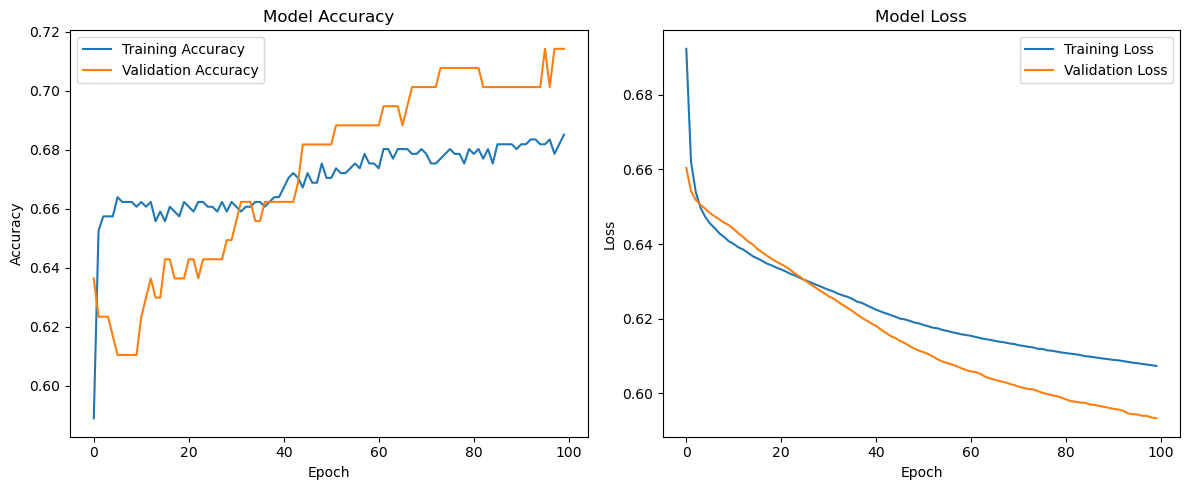

In [68]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()